# **Tidy Data Project**
**Goal:** Apply the principles of tidy data to clean, transform, and do an exploratory data analysis on the selected dataset.

**The 3 Principles of Tidy Data:**
1.   Each variable forms a column.
2.   Each observation forms a row.
3.   Each value is a cell.

**Importance:** Most tools in data analytics assume a tidy dataset, as it facilitates aggregating and analyzing data following this standard data structure of a tidy data foundation. Hence, tidy data principles allow for a standard way of organizing values in a dataset, facilitating data exploration and analysis [(Wickham, 1)](https://vita.had.co.nz/papers/tidy-data.pdf).

**Importing the Data**



*   By mounting Google Drive, the data file is called upon as a CSV file and imported.
*   The untidy dataset is now ready to be cleaned and transformed!



In [1]:
import pandas as pd#import data
df_olympics = pd.read_csv("/content/drive/MyDrive/CHE ND Soph Spring! 2025/Elements 2/olympics_08_medalists.csv") #call upon data file as csv
df_olympics.head() #print data (untidy)
# replace google drive link with df_olympics = pd.read_csv("olympics_08_medalists.csv")

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Cleaning & Tidy Process
Scenario:
*   The dataframe describes olympic medalists distinguished by their sex and the sport in which they won a gold, silver, bronze, or no medal.
*   Each row represents a medalist and the columns represent both sex and sport, meaning there are multiple variables being considered per column in the untidy dataset.
*   To analyze sport and sex pertaining to each medalist and the type of medal they won (if any), I will convert the dataframe from wide to long format using the [pd.melt( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html#pandas.DataFrame.melt) function.


Tidy Data Principle Violated:
*   The [pd.melt( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html#pandas.DataFrame.melt) function converts wide to long format so that each variable forms a column.
*   In this case, the sport and sex categories are embedded in the column names instead of there being two separate "Sport" and "Sex" columns.


Key Parameters:
*   id_vars: columns to keep fixed; identifiers
*   value_vars: columns to unpivot/convert into row values
*   var_name: name for the new column that will hold the former column names/the variable name
*   value_name: name for the new column that will hold the values from the melted columns

When to Use [pd.melt( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html#pandas.DataFrame.melt):
*   When you have a wide formatted dataframe with various columns representing repeated information and you wish to convert the dataframe into a long format in which each row represents one observation rather than many observations
*   The result is a more organized, easy-to-read dataframe

Tidy Outcome:
*   Each observation forms a row
*   Each variable has it own column rather than multiple variables being fused into one column



In [2]:
olympics_melted_df = pd.melt(df_olympics, id_vars=['medalist_name'],#melt data frame to gather columns into rows. medalist name is the column to keep fixed
                              value_vars=['male_archery', 'female_archery', 'male_athletics', 'female_athletics', 'male_badminton', 'female_badminton', 'male_baseball', 'male_basketball', 'female_basketball', 'male_boxing', 'male_canoeing and kayaking', 'female_canoeing and kayaking', 'male_road bicycle racing', 'female_road bicycle racing','male_track cycling', 'female_track cycling', 'male_mountain biking', 'female_mountain biking', 'male_bmx', 'female_bmx', 'male_diving', 'female_diving', 'female_equestrian sport', 'male_equestrian sport', 'male_fencing', 'female_fencing', 'male_field hockey', 'female_field hockey','male_association football', 'female_association football', 'male_artistic gymnastics', 'female_artistic gymnastics', 'female_rhythmic gymnastics', 'male_trampoline gymnastics','female_trampoline gymnastics','male_handball', 'female_handball', 'male_judo', 'female_judo', 'male_modern pentathlon', 'female_modern pentathlon', 'male_rowing', 'female_rowing', 'male_sailing', 'female_sailing', 'male_shooting sport', 'female_shooting sport', 'male_swimming', 'female_swimming', 'female_synchronized swimming', 'male_table tennis', 'female_table tennis', 'male_taekwondo', 'female_taekwondo', 'male_tennis','female_tennis','male_triathlon','female_triathlon','male_beach volleyball','female_beach volleyball','male_volleyball','female_volleyball','male_water polo','female_water polo','male_weightlifting','female_weightlifting','male_freestyle wrestling','female_freestyle wrestling','male_greco-roman wrestling' ],#converting these columns into rows in the tidy dataframe
                              var_name='Olympic Event Category', value_name='Type of Medal') #renaming the new column that is going to hold the former column names as well as the new column that is going to hold the values from the melted column
print("Melted (Tidy) Olympic Medalist DataFrame") #printing a title for the tidy dataframe
print(olympics_melted_df)#printing the tidy dataframe in its new format


Melted (Tidy) Olympic Medalist DataFrame
            medalist_name      Olympic Event Category Type of Medal
0         Aaron Armstrong                male_archery           NaN
1           Aaron Peirsol                male_archery           NaN
2        Abdullo Tangriev                male_archery           NaN
3       Abeer Abdelrahman                male_archery           NaN
4                 Abhinav                male_archery           NaN
...                   ...                         ...           ...
129370        Éver Banega  male_greco-roman wrestling           NaN
129371  Ólafur Stefánsson  male_greco-roman wrestling           NaN
129372      Óscar Brayson  male_greco-roman wrestling           NaN
129373   Łukasz Pawłowski  male_greco-roman wrestling           NaN
129374        Živko Gocić  male_greco-roman wrestling           NaN

[129375 rows x 3 columns]


## Creating New Columns in a Dataframe
Scenario:
*   Because there are multiple variables in the new column created after using the [pd.melt( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html#pandas.DataFrame.melt) function, I need to use the [str.split( )](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) function to create two new columns.

Tidy Data Principle Violated
*   The [str.split( )](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) function creates new, separate columns for each variable when there are multiple variables in a column.
*   In this case, the sex and sport of the medalist are the two variables fused in the new column 'Olympic Event Category' created upon using the [pd.melt( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html#pandas.DataFrame.melt) function to change the dataframe format from wide to long.

Key Parameters:
*   pat = string/regular expression to split on; in this case, it is the underscore separating sex from sport.
*   expand = expands the split strings into columns; in this case, it is True so that the expanded dataframe with the two new columns for sport and sex are returned in the updated dataframe

When to use [str.split( )](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html):
*   To create new columns for each variable when there are multiple variables in the same column

Tidy Outcome:
*   Each variable in the dataframe has its own column, facilitating analysis.









In [3]:
olympics_melted_df[['Sex', 'Sport']] = olympics_melted_df['Olympic Event Category'].str.split('_', expand=True)#creating two new columns to separate the two fused variables in the olympic event category column
print(olympics_melted_df)#printing the updated dataframe with 2 new columns

            medalist_name      Olympic Event Category Type of Medal   Sex  \
0         Aaron Armstrong                male_archery           NaN  male   
1           Aaron Peirsol                male_archery           NaN  male   
2        Abdullo Tangriev                male_archery           NaN  male   
3       Abeer Abdelrahman                male_archery           NaN  male   
4                 Abhinav                male_archery           NaN  male   
...                   ...                         ...           ...   ...   
129370        Éver Banega  male_greco-roman wrestling           NaN  male   
129371  Ólafur Stefánsson  male_greco-roman wrestling           NaN  male   
129372      Óscar Brayson  male_greco-roman wrestling           NaN  male   
129373   Łukasz Pawłowski  male_greco-roman wrestling           NaN  male   
129374        Živko Gocić  male_greco-roman wrestling           NaN  male   

                        Sport  
0                     archery  
1          

## Dropping Columns in a Dataframe
Scenario:
*   Since the column with multiple variables that was created after melting the dataframe still remains, I need to use the [drop( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) function to get rid of it, as two new columns were already created to store each unique variable on its own using the [str.split( )](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) function rather than combining them into the same column.

Tidy Data Principle Violated
*   The [drop( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) function removes a select portion of data from a dataframe.
*   In this case, the data being "dropped" from the dataframe is that which falls under the 'Olympic Event Category' because it contains multiple variables in the same column, which violates one of the 3 principles of tidy data: "Each variable forms a column." 2 new columns were already created avbove using the  [str.split( )](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) function which store the information in the column being dropped, and these 2 new columns are organized in a more tidy manner by which each variable belongs to its own column.

Key Parameters:
*   label = column being dropped
*   axis = 1 for columns, 0 for index (in this case, 1 is used because a column is being dropped)
*   inplace = True (this allows the operation to be performed and for nothing to be returned. Since the column is being dropped, nothing new should be returned. Only the dataframe should be returned without the column that gets dropped as a result of running this function.)

When to use [drop( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html):
*   Use this function when you want to drop a desired part of the dataframe, particularly aspects of the dataframe which violate any of the tidy data principles

Tidy Outcome:
*   No tidy data principles are violated as the column housing multiple variables was dropped and 2 new columns were created for each of those distinct variables instead using the [drop( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) function and the [str.split( )](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) function, respectively.







In [4]:
olympics_melted_df.drop('Olympic Event Category', axis=1, inplace=True) #dropping the column with multiple variables since 2 new ones with the variables separated were already created
#columns are axis = 1. True means doing this without reassigning dataframe
print(olympics_melted_df)#printing the updated dataframe without the fused variables column

            medalist_name Type of Medal   Sex                  Sport
0         Aaron Armstrong           NaN  male                archery
1           Aaron Peirsol           NaN  male                archery
2        Abdullo Tangriev           NaN  male                archery
3       Abeer Abdelrahman           NaN  male                archery
4                 Abhinav           NaN  male                archery
...                   ...           ...   ...                    ...
129370        Éver Banega           NaN  male  greco-roman wrestling
129371  Ólafur Stefánsson           NaN  male  greco-roman wrestling
129372      Óscar Brayson           NaN  male  greco-roman wrestling
129373   Łukasz Pawłowski           NaN  male  greco-roman wrestling
129374        Živko Gocić           NaN  male  greco-roman wrestling

[129375 rows x 4 columns]


## Dropping Rows in a Dataframe
**Scenario:**
*   There are many rows in the dataframe with "NaN" values that need to be dropped using the [dropna( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function to remove the missing values.
*   In this way, the only data that will appear in the updated dataframe is that pertaining to rows in which medalists were awarded a medal.

**Key Parameters:**
*   **subset** = label of column in which missing values that need to be dropped are located
*   **inplace** = True so the Dataframe gets modified after dropping the missing values indicated

**When to use [dropna( ):](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**
*   Use this function when you want to drop missing (null) values from a dataset

**Tidy Outcome:**
*   Missing values are no longer present in the dataset, making it more concise and facilitating data analysis and modeling.









In [5]:
olympics_melted_df.dropna(subset='Type of Medal', inplace=True)#dropping rows with NaN values from the dataframe/only keeping rows in which medalists won a medal
print(olympics_melted_df)#printing updated dataframe without rows containing NaN
#dropping any rows with NaN


              medalist_name Type of Medal   Sex                  Sport
177            Bair Badënov        bronze  male                archery
676           Ilario Di Buò        silver  male                archery
682            Im Dong-hyun          gold  male                archery
760               Jiang Lin        bronze  male                archery
920          Lee Chang-hwan          gold  male                archery
...                     ...           ...   ...                    ...
129057        Steeve Guénot          gold  male  greco-roman wrestling
129284  Yannick Szczepaniak        bronze  male  greco-roman wrestling
129287       Yavor Yanakiev        bronze  male  greco-roman wrestling
129325      Yury Patrikeyev        bronze  male  greco-roman wrestling
129359         Zoltán Fodor        silver  male  greco-roman wrestling

[1830 rows x 4 columns]


## Pivot-Tables

**Goal:** Create varioius spreadsheet style pivot tables by returning reshaped dataframes according to given index and column values using an aggregation function to specify how to summarize the data

**Importance:** Reshape, reorganize, and manipulate data to facilitate data analysis and modeling

**Scenario:**
*   The tidy dataframe contains the types of medals won by different medalists differentiated by their sex and the sport they competed in.
*   To facilitate analysis, it would be helpful to pivot the dataset so that a desired variable(s) can become its own column in the updated dataframe; this promotes ease when putting together visualizations, which will be shown further along in this project.

**Tidy Data Consideration:**
*   The [pivot_table( )](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) function is different than the [pivot( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html) function in that the [pivot_table( )](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) function aggregates data, unlike the [pivot( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html) function.

**Key Parameters:**
*   **index** = keys to group by on the pivot table index
*   **columns** = keys to group by on the pivot table columns
*   **values** = column(s) to aggregate
*   **aggfunc** = calculates in relation to desired values (in the first pivot table, the aggfunc = count, so the medal count will be organized in such a way that categorizes the medal count per sport by sex)

**When to use [pivot_table( )](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html):**
*   Use the [pivot_table( )](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) function to return a spreadsheet style dataframe in a different format customized based on the chosen parameters

**Tidy Outcome:**
*   Dataframe is reorganized in such a way that facilitates analysis and pattern observation regarding trends in the dataset, especially through the use of the aggregation function that is a part of the larger [pivot_table( )](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) function



In [6]:
pivot_df = pd.pivot_table(olympics_melted_df, index=['Sport', 'Sex'], columns='Type of Medal', values='Sex', aggfunc= 'count') #creating pivot table that counts type of medal earned based on both sex and sport parameters
pivot_df#printing the pivot table

Type of Medal                bronze  gold  silver
Sport                Sex                         
archery              female     4.0   2.0     3.0
                     male       4.0   3.0     4.0
artistic gymnastics  female     7.0   7.0     6.0
                     male      12.0   7.0    10.0
association football female    18.0  18.0    18.0
...                             ...   ...     ...
volleyball           male      12.0  12.0    12.0
water polo           female    13.0  13.0    13.0
                     male      13.0  13.0    13.0
weightlifting        female     7.0   7.0     7.0
                     male       8.0   8.0     8.0

[69 rows x 3 columns]

In [7]:
pivot_df_1 = pd.pivot_table(olympics_melted_df, index='Sex', columns='Type of Medal', values='medalist_name', aggfunc= 'count') #creating pivot table counting number of types of medals won by medalist name organized based on distinct sex, providing the actual count
pivot_df_1#printing the pivot table

Type of Medal,bronze,gold,silver
Sex,,,
female,279,256,263
male,374,315,343


In [8]:
pivot_df_2 = pd.pivot_table(olympics_melted_df, index='Type of Medal', columns='Sex', values='medalist_name', aggfunc= 'count') #creating pivot table that counts number of medals won by medalist name, providing the actual count. similar to pivot_df_1, I just reversed the index and the columns to change the table format
pivot_df_2#printing pivot table

Sex,female,male
Type of Medal,,
bronze,279,374
gold,256,315
silver,263,343


In [9]:
pivot_df_3 = pd.pivot_table(olympics_melted_df, index='Sport', columns='Type of Medal', values='medalist_name', aggfunc= 'count') #creating pivot table that counts type of medal earned based on sport parameters
#same as pivot_df just ignoring sex as another differentiating factor and rather viewing the sum of medal count per sport categorized by type of medal (both sexes included in each count for type of medal and sport, not differentiated by sex as is in pivot_df pivot table)
pivot_df_3#printing pivot table

Type of Medal,bronze,gold,silver
Sport,,,
archery,8,5,7
artistic gymnastics,19,14,16
association football,36,37,36
athletics,55,52,59
badminton,7,7,8
baseball,24,24,24
basketball,24,23,24
beach volleyball,4,4,4
bmx,2,2,2


## Visualizations
**Goal:** To communicate insights from data in a clear, effective, informative, and visually-appealing manner.

**Importance:** Visualizations make data easier to interpret and understand [(Wickham, 14)](https://vita.had.co.nz/papers/tidy-data.pdf).


##**Histogram**
**When to use [sns.histplot( )](https://seaborn.pydata.org/generated/seaborn.histplot.html) :**
*   Use the [sns.histplot( )](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to represent the distribution of variables by counting the number of observations that fall within the desired variable to be analyzed/counted
*   Must import dataframe as seaborn to import the seaborn library so that this particular visualization can be created, as it comes from the seaborn library (not pandas) so the seaborn library must be imported prior to creating a seaborn visualization!

**Key Parameters:**
*   **data** = input data structure (in this case, olympic medalist dataset)
*   **x, y** = variables that specify postions on x and y axes (in this case, type of medal (either bronze, gold, or silver) will be the category used to differentiate medal count)

**Tidy Outcome:**
*   A visualization is created demonstrating the amount of medals won distinguished by type of medal on the x-axis. This visualization in particular does not take into account distinct sex and sports. Rather, it looks only at the amount of medals won by medalists of any sex distinguished by whether that medal was gold, silver, or bronze. In other words, the visualization invites us to consider analyzing the dataset by looking at the total medal count regardless of each medalists' sex/sport.



<Axes: xlabel='Type of Medal', ylabel='Count'>

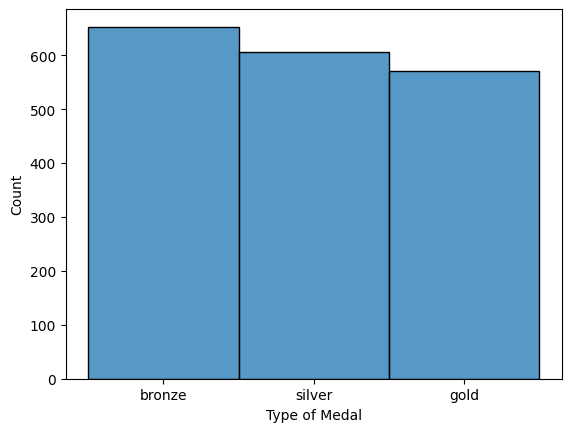

In [10]:
import seaborn as sns#importing seaborn library
sns.histplot(olympics_melted_df['Type of Medal'])#create histplot to show a visualization counting medals won differentiated by type of medal on x-axis


##**Plot**
**When to use [plot( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) :**
*   Use the [plot( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) function to make plots of a dataframe

**Key Parameters:**
*   **data** = the object for which the method is called
*   **kind** = "bar" (This indicates the kind of plot to produce. In this case, a bar plot is produced using kind="bar")

**Tidy Outcome:**
*   A barplot is created using a pivot table that was previously assigned to the variable "pivot_df_1," demonstrating a way by which creating pivot tables can facilitate the process of creating visualizations to analyze the data in a more efficient manner. This barplot gives a relative idea of each medalist's individual medal count distinguished by sex and medal type, as seen below.

<Axes: xlabel='Sex'>

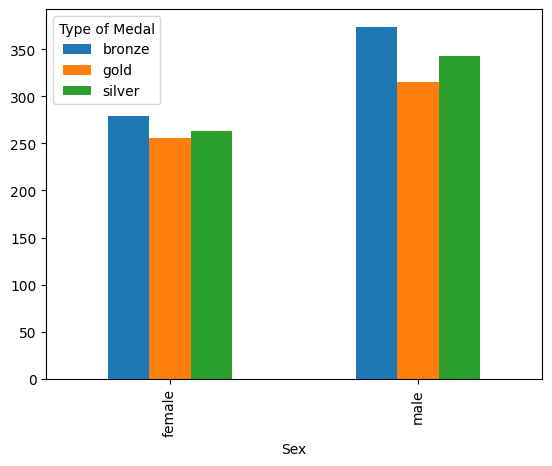

In [11]:
pivot_df_1.plot(kind="bar")#create barplot based on each medalist's individual medal count distinguished by sex and medal type (dif colors)

##**Plot**
**When to use [plot( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) :**
*   Use the [plot( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) function to make plots of a dataframe

**Key Parameters:**
*   **data** = the object for which the method is called
*   **kind** = "bar" (This indicates the kind of plot to produce. In this case, a bar plot is produced using kind="bar")

**Tidy Outcome:**
*   A barplot is created using a pivot table that was previously assigned to the variable "pivot_df_2," demonstrating a way by which creating pivot tables can facilitate the process of creating visualizations to analyze the data in a more efficient manner. This barplot gives a relative idea of each medalist's individual medal count distinguished by sex and medal type, as seen below. The difference between this barplot and the one above is solely a change in the label on the x-axis and the designated color key. In other words, it is presenting the same data as that shown in the barplot above just in a slightly different format/organization.

<Axes: xlabel='Type of Medal'>

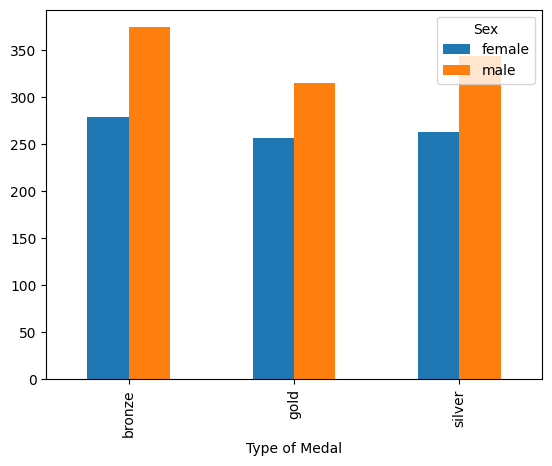

In [12]:
pivot_df_2.plot(kind="bar")#create barplot based on each medalist's individual medal count by sex and medal type (dif colors)

##**Heatmap**
**When to use [sns.heatmap( )](https://seaborn.pydata.org/generated/seaborn.heatmap.html) :**
*   Use the [sns.heatmap( )](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to plot rectangular data as a color-coded matrix

**Key Parameters:**
*   **data** = rectangular dataset (in this case, a pandas dataframe is provided, so, by default, the index/column information gets used to label columns and rows, as seen below)

**Tidy Outcome:**
*   A heatmap is created using a pivot table that was previously assigned to the variable "pivot_df_1," demonstrating a way by which creating pivot tables can facilitate the process of creating visualizations to analyze the data in a more efficient manner. This heatmap shows the medal count distinguished by type of medal won/awarded while comparing both female and male sex categories simultaneously given by the organization of the heatmap. The count matches the colors on the heatmap scale, as seen below. This heatmap is yet another way to visualize the first barplot created above.

<Axes: xlabel='Type of Medal', ylabel='Sex'>

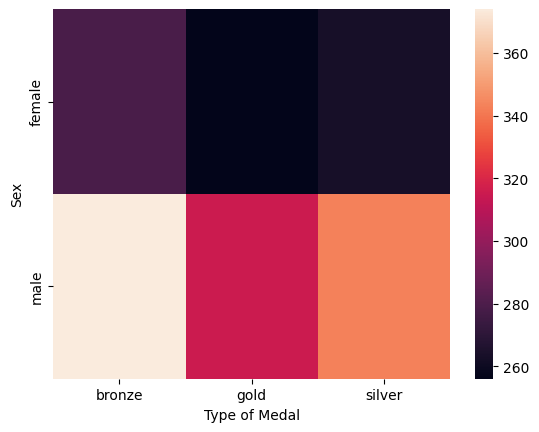

In [13]:
sns.heatmap(pivot_df_1)#created heatmap to show count of types of medal won while simultaneously comparing female and male categories. the count matches the colors on heatmap scale.
#another way to visualize barplot above

##**Heatmap**
**When to use [sns.heatmap( )](https://seaborn.pydata.org/generated/seaborn.heatmap.html) :**
*   Use the [sns.heatmap( )](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to plot rectangular data as a color-coded matrix

**Key Parameters:**
*   **data** = rectangular dataset (in this case, a pandas dataframe is provided, so, by default, the index/column information gets used to label columns and rows, as seen below)

**Tidy Outcome:**
*   A heatmap is created using a pivot table that was previously assigned to the variable "pivot_df_2," demonstrating a way by which creating pivot tables can facilitate the process of creating visualizations to analyze the data in a more efficient manner. This heatmap shows the medal count distinguished by type of medal won/awarded while comparing both female and male sex categories simultaneously given by the organization of the heatmap. Yet, the organization of this heatmap is slightly different then that of the heatmap above (similar to the differentiation between the two barplots above using the slighlty different pivot tables to call upon the data to create the visualization). IN other words, this heatmap is the same as the one above just formatted differently by interchanging the x and y axes Similarily, the count matches the colors on the heatmap scale, as seen below. This heatmap is yet another way to visualize the second barplot created above.

<Axes: xlabel='Sex', ylabel='Type of Medal'>

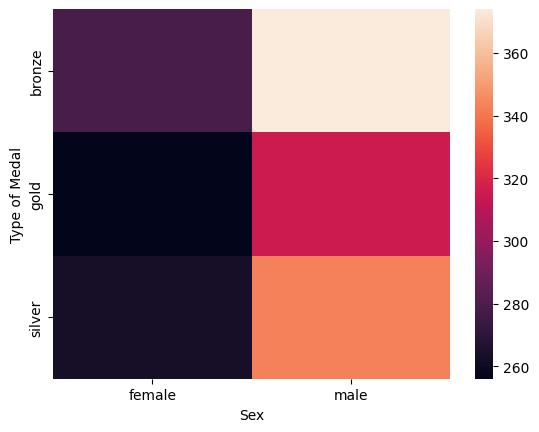

In [14]:
sns.heatmap(pivot_df_2) #created heatmap to show count of types of medal won while also comparing female and male categories in a slightly different orientation than the heatmap above

##**Clustermap**
**When to use [sns.clustermap( )](https://seaborn.pydata.org/generated/seaborn.clustermap.html) :**
*   Use the [sns.clustermap( )](https://seaborn.pydata.org/generated/seaborn.clustermap.html) function to plot a dataset as a hierarchically-clustered heatmap

**Key Parameters:**
*   data = rectangular data for clustering (cannot have null values)
*   pivot_kws = Optional (can provide key word arguments for pivot to create rectangular dataframe)
*   method = Linkage method to use for calculating clusters (in this case, 'average')
*   metric = Distance metric to use for the data
*   z_score = Optional (0=rows, 1=columns)
*   standard_scale = Optional (0=rows, 1=columns)
*   figsize = (width, height)
*   cbar_kws = Optional (to add a label to the color bar)
*   row_cluster = True (cluster the rows)
*   col_cluster = True (cluster the columns)
*   row_linkage =  Optional (precomputed linkage matrix for rows)
*   col_linage = Optional (precomputed linkage matrix for columns)
*   row_colors = Optional
*   col_colors = Optional
*   mask = Optional (if passed, data will not be shown in cells where mask is true)
*   dendrogram_ratio = Proportion of the figure size dedicated to the two marginal elements...(row, column) ratios, respectively
*   colors_ratio = Proportion of the figure size dedicated to the two marginal elements...(row, column) ratios, respectively
*   cbar_pos = Position of the color bar axes in the figure
*   tree_kws = Optional (parameters used to plot the dendogram lines of the tree)

**Tidy Outcome:**
*   A clustermap is created using a pivot table that was previously assigned to the variable "pivot_df_3," demonstrating a way by which creating pivot tables can facilitate the process of creating visualizations to analyze the data in a more efficient manner. This clustermap shows the relative amount of types of medals won in each sport pertaining to the olympic dataset. The count matches the colors on the heatmap scale, as seen below. Although this map gives a general idea about the data not exact numerical data as could be found in a data table, it provides the viewer with a visualization focusing on color, which is appealing to the viewer and attracts their attention.

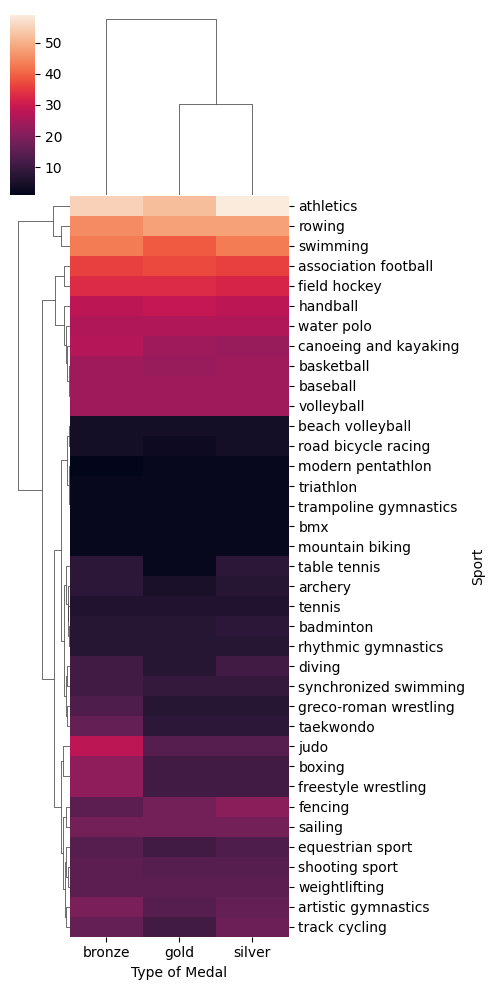

In [15]:
sns.clustermap(pivot_df_3, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(5, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None)#created clustermap to show relative amount of type of medals won in each sport

##**Swarmplot**
**When to use [sns.swarmplot( )](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) :**
*   Use the [sns.swarmplot( )](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) function to create a categorical scatterplot with points adjusted so that they do not overlap one another

**Key Parameters:**
*   **data** = rectangular dataset (In this case, a pandas dataframe is provided, so, by default, the index/column information gets used to label columns and rows, as seen below. Therefore, the x and y parameters are set to None since the pandas dataframe default will already have taken care of the x and y axes for this plot)

**Tidy Outcome:**
*   A swarmplot is created using a pivot table that was previously assigned to the variable "pivot_df_3," demonstrating a way by which creating pivot tables can facilitate the process of creating visualizations to analyze the data in a more efficient manner. This swarmplot shows how many types of medals were won in each distinct sport. In the plot, one dot is placed on the visualization for every value of medals won relative to the y-axis. In other words, it gives a general idea that most sport categoires had a smaller value of total medal counts, as shown by the triangle like shape of each column (more dots on the bottom in a line in comparison to less dots toward the top of the triangle like columns because it is more rare for sport categories to have a higher total count of a particular medal type). Each column for medal type only has one dot at the top of its triangle-like column, suggesting it is rare for sport categories to win a lot of medals respectively/in that sport alone.

<Axes: xlabel='Type of Medal'>

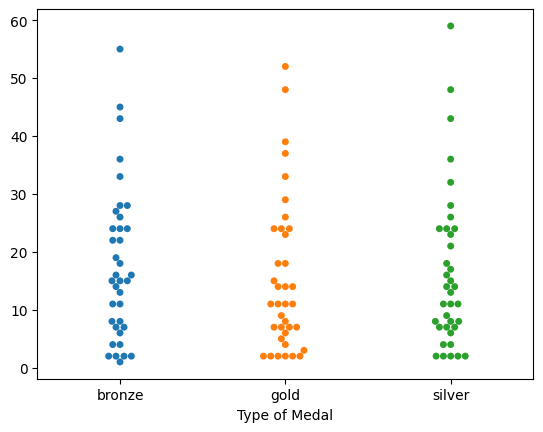

In [16]:
sns.swarmplot(pivot_df_3, x=None, y=None)#created swarmplot to show a visualization of how many types of medals were won in each distinct sport